# Premalatha mam's Project on Superstore data-(Time Series):
## Project Abstract:
### Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. 
## Problem Statement:
### To demonstrate different approaches for forecasting retail sales time series.

### 1. Importing Necessary Libraries:

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### 2. Importing the data:

In [2]:
df = pd.read_excel("Sample - Superstore.xls")

### 3. EDA:

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3267,3268,CA-2014-143840,2014-05-22,2014-05-29,Standard Class,EH-14185,Evan Henry,Consumer,United States,Decatur,...,35601,South,TEC-PH-10002660,Technology,Phones,Nortel Networks T7316 E Nt8 B27,135.980,2,0.0,33.9950
1266,1267,US-2014-167738,2014-12-24,2014-12-29,Standard Class,JC-16105,Julie Creighton,Corporate,United States,Los Angeles,...,90045,West,OFF-ST-10003306,Office Supplies,Storage,Letter Size Cart,142.860,1,0.0,41.4294
3086,3087,CA-2017-118773,2017-02-09,2017-02-14,Standard Class,TP-21415,Tom Prescott,Consumer,United States,Houston,...,77070,Central,FUR-FU-10000550,Furniture,Furnishings,Stacking Trays by OIC,3.984,2,0.6,-2.6892
9170,9171,US-2016-155768,2016-12-01,2016-12-01,Same Day,LB-16795,Laurel Beltran,Home Office,United States,Oxnard,...,93030,West,FUR-FU-10000448,Furniture,Furnishings,Tenex Chairmats For Use With Carpeted Floors,31.960,2,0.0,1.5980
3552,3553,CA-2016-152555,2016-03-29,2016-04-02,Second Class,ME-17320,Maria Etezadi,Home Office,United States,Chicago,...,60653,Central,TEC-PH-10001254,Technology,Phones,Jabra BIZ 2300 Duo QD Duo Corded Headset,812.736,8,0.2,60.9552


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750


In [9]:
# Checking for missing values:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### No missing values present in the data.

In [10]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### So we have the data of furnitures for 4 years

In [11]:
tdf = df.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
tdf

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [13]:
# Creating a new dataframe to work on time & sales features
tdf = tdf.set_index('Order Date')
tdf.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [14]:
tdf

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


In [15]:
# Changing the average monthly sales to monthly startup sales value because the previous data is tricky to work with:
y = tdf['Sales'].resample('MS').mean()

In [16]:
y

Order Date
2014-01-01     647.131591
2014-02-01     225.994600
2014-03-01    2320.458708
2014-04-01    1178.972708
2014-05-01     844.581679
2014-06-01    1383.805104
2014-07-01    1414.433042
2014-08-01    1162.894521
2014-09-01    2920.619671
2014-10-01    1084.599759
2014-11-01    2711.335059
2014-12-01    2483.772161
2015-01-01    1009.670867
2015-02-01     703.024176
2015-03-01    1489.471231
2015-04-01    1367.808340
2015-05-01    1115.988389
2015-06-01    1127.149636
2015-07-01    1198.555208
2015-08-01    1677.196918
2015-09-01    2583.836720
2015-10-01    1207.881673
2015-11-01    2713.305839
2015-12-01    2497.317373
2016-01-01     882.975762
2016-02-01     957.450625
2016-03-01    1846.995536
2016-04-01    1490.386115
2016-05-01    1965.094069
2016-06-01    1494.242000
2016-07-01    1570.478520
2016-08-01    1111.263368
2016-09-01    2621.786604
2016-10-01    2210.657222
2016-11-01    2738.343648
2016-12-01    3464.251536
2017-01-01    1911.798870
2017-02-01    1015.056670
2

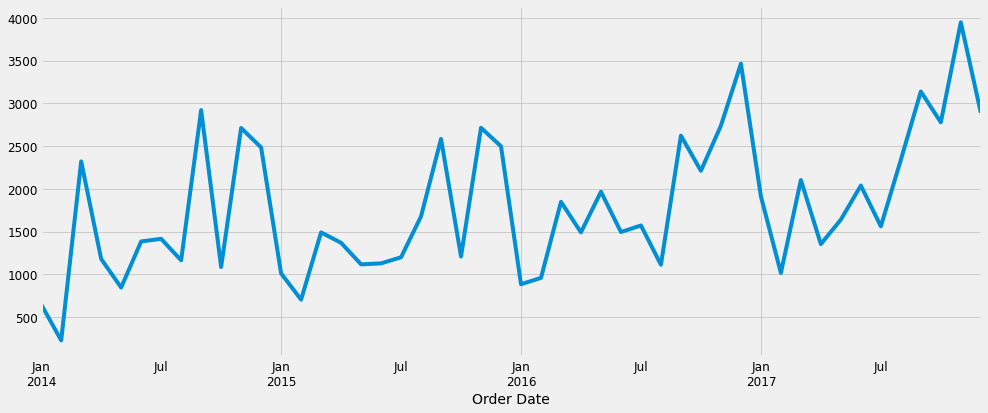

In [17]:
# Visualizing Furniture Sales Time Series Data
y.plot(figsize=(15, 6))
plt.show()

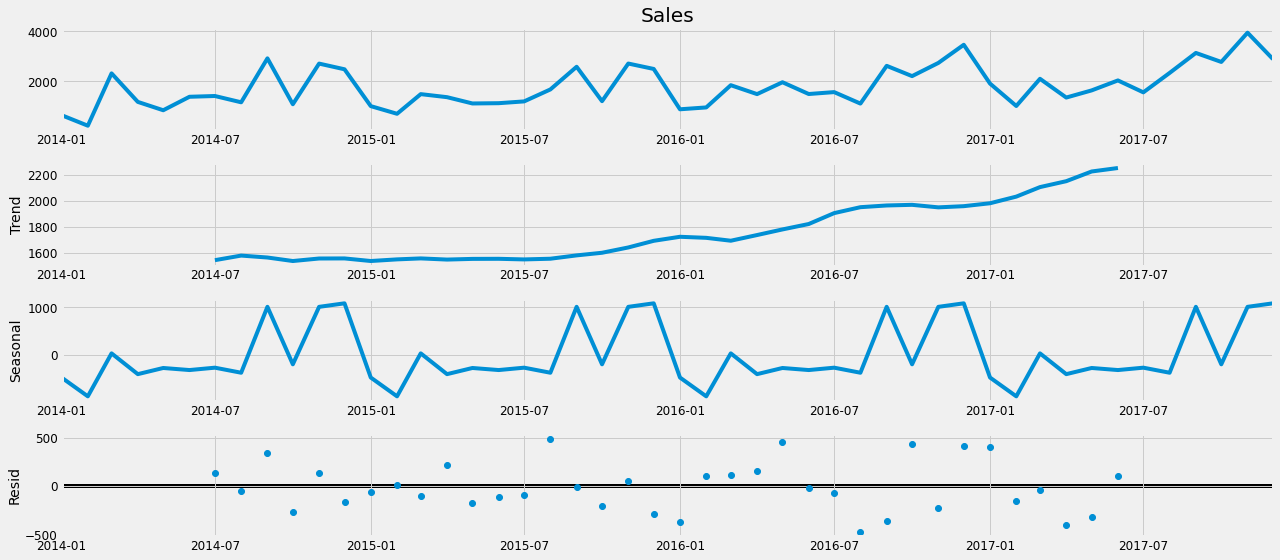

In [18]:
# Visualization of the data with respect to trend, seasonality, and noise:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Checking for stationarity:

In [19]:
from statsmodels.tsa.stattools import adfuller

adfuller(y)

(-4.7568426282014,
 6.572451076431882e-05,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 593.8051198374499)

In [20]:
# Get the p-value
res = adfuller(y)
res[1]

6.572451076431882e-05

In [21]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(y, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,5.195312,0.022648


### Time series forecasting with ARIMA

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:849.2964734613763
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1558.8313168894736
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:542.5524077991603
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:364.82273932499686
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:556.403053968139


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1474.6469575125755
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:379.31311116746053
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:365.93920356278113
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:800.954661500112
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2807.067046848553


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.8097917495901
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:349.61477907426774
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.3100438741558


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2652.4007378031793
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:378.6443983832909
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:350.75218248805254
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:761.9496656386243
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1455.6317099957
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:545.4367571316703
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:349.8820964017871
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:549.6307002149172
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1433.653774934236
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:367.6372959140954
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:350.85492807548763
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:726.8822219812013


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:954.7679980467474
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:506.5102043890778
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:325.30283752155196
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:539.5587096464571
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2473.2739551493337
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:355.763159275358
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:325.3887020408618
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:777.9055059640486


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1364.8572665543807
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:543.6595443248249
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:362.59038113868513
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:548.430123001468


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1320.1066711997776
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:362.40331406167616
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:364.38236025776763
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:745.0593148963671


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:684.2555333475809
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:529.4623072731885
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:340.99592268065066
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:536.5790993203838


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2168.953958221272
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:357.30146132392457
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:342.2949486885299
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:753.5151712720058


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1604.114082894032
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:535.7885418383611
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:347.16839764850397
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:528.5408441618997


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1332.6578088056401
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:347.54883822154176
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:348.07080843690017
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:728.4101661769536


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2294.48964588577
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:508.2854500932582
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:327.30281514750806
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:524.7930009178868


C:\Users\roshs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:923.276438688985
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.1266572063263
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:327.37433705600154


### The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:325.30283752155196) yields the lowest AIC value of 325.30. Therefore we should consider this to be optimal option.

### Fitting the ARIMA model:

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,#enforce_stationarity=False
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8875      0.125     -7.097      0.000      -1.133      -0.642
ma.S.L12      -1.0001      0.256     -3.899      0.000      -1.503      -0.497
sigma2      1.303e+05   1.97e-06   6.62e+10      0.000     1.3e+05     1.3e+05


### Running model diagnostics to investigate any unusual behavior:

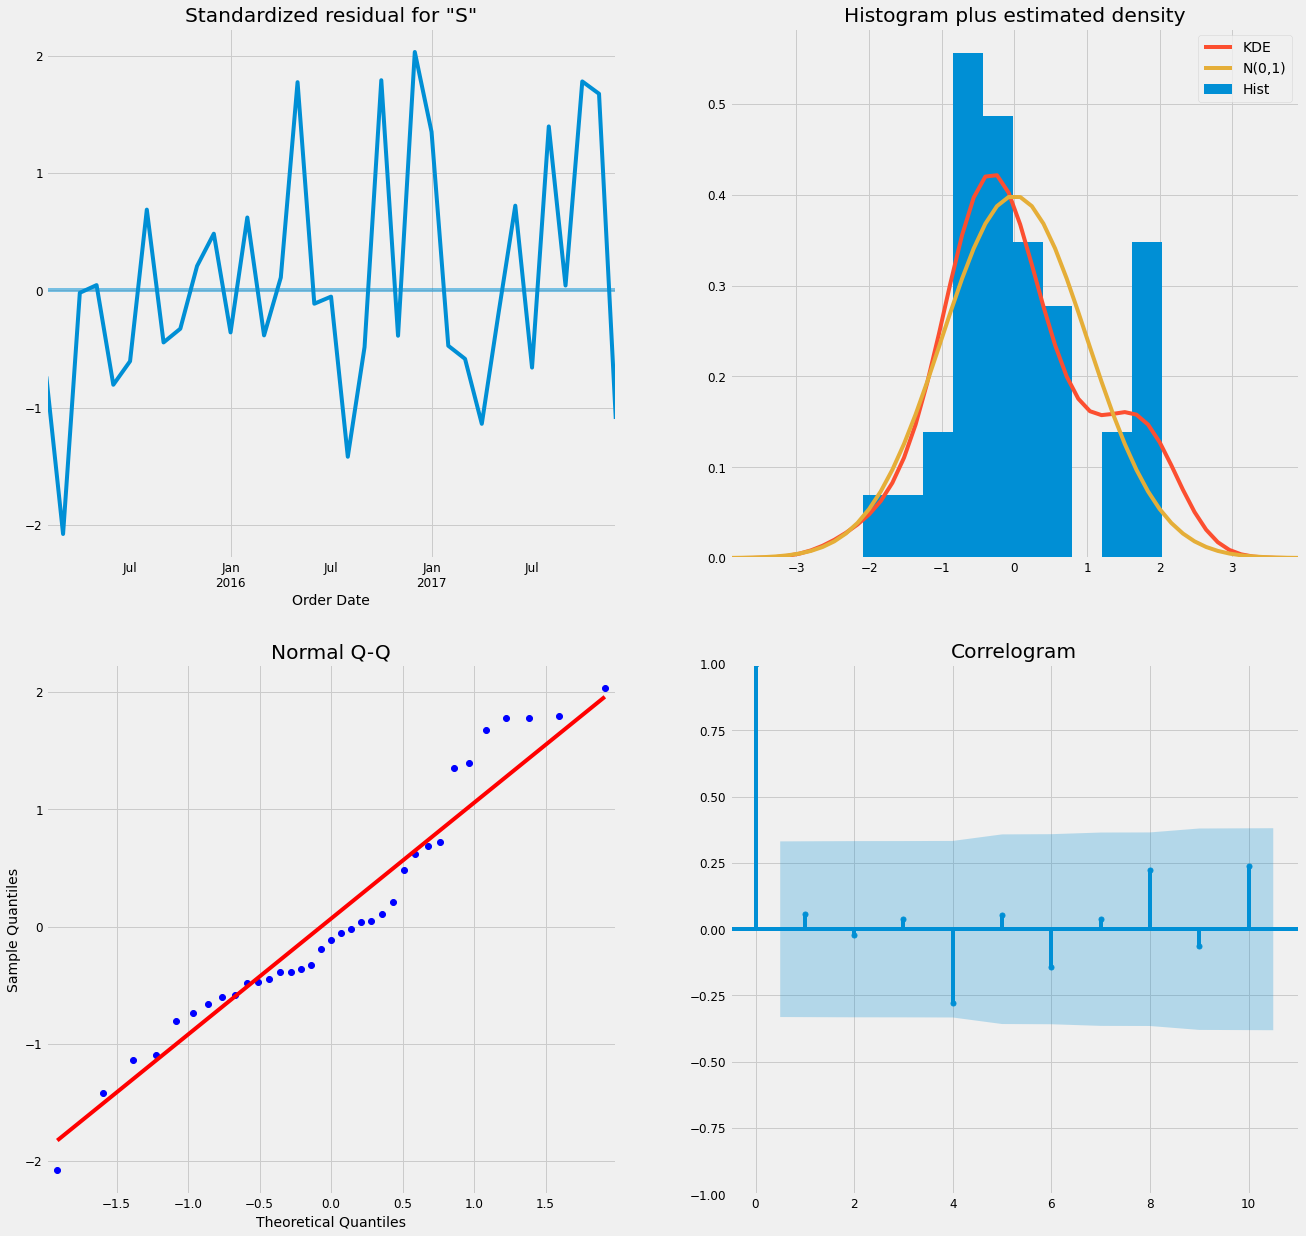

In [39]:
results.plot_diagnostics(figsize=(20, 20))
plt.show()

### Validating forecasts

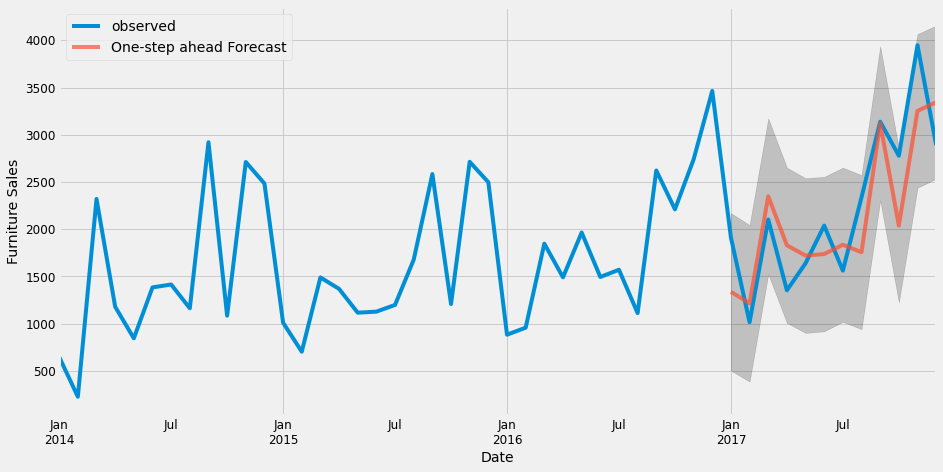

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 200486.83


In [30]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 447.76


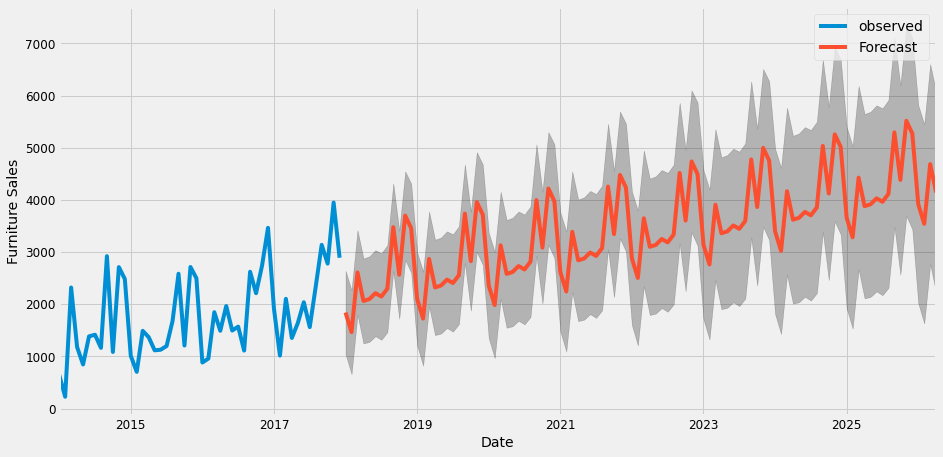

In [31]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [32]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [33]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


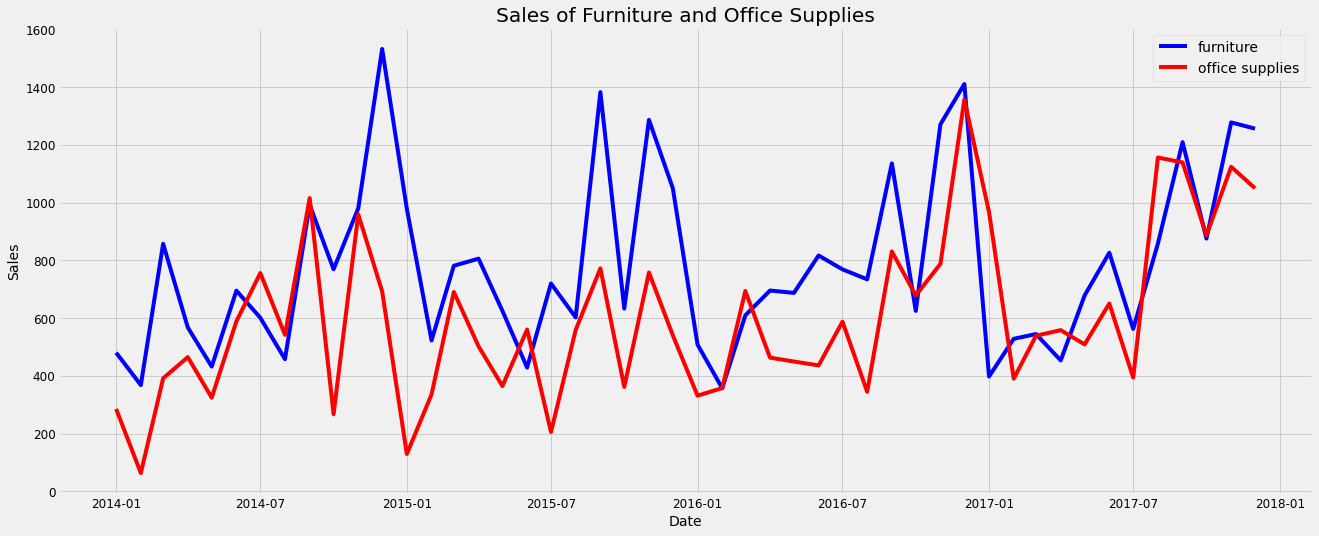

In [34]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [35]:
first_date = store[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

KeyError: (6, 'Order Date')

In [ ]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [ ]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [ ]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

In [ ]:
furniture_model.plot_components(furniture_forecast);

In [ ]:
office_model.plot_components(office_forecast);